## Sprint 機械学習スクラッチ 決定木

In [1]:
import numpy as np

## 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード 
$t$
 に対するジニ不純度 
$I(t)$
 は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。
 $$
 I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
 $$
 $t$
 : ノードのインデックス

$i$
 : クラスのインデックス

$K$
 : クラスの数

$C_i$
 : i番目のクラス

$P(C_i|t)$
 :　t番目のノードにおける
$C_i$
の割合

$N_{t,i}$
 : t番目のノードのi番目のクラスに属するサンプル数

$N_{t,all}$
 : t番目のノードのサンプルの総数
 
**《例》**

- クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
- クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
- クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
- クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [2]:
def _Gini_impurity(y):
    node_samples = np.unique(y, return_counts=True)[1]
    return 1 - np.power(node_samples / node_samples.sum(), 2).sum()

In [3]:
y1 = np.array([1]*15 + [2] * 15)
y2 = np.array([1]*15 + [2] * 15 + [3]*15)
y3 = np.array([1]*18 + [2] * 12)
y4 = np.array([1]*30 + [2] * 0)

In [4]:
np.unique(y1, return_counts=True)

(array([1, 2]), array([15, 15]))

In [5]:
np.power(np.unique(y1, return_counts=True)[1], 2)

array([225, 225])

In [6]:
_Gini_impurity(y1)

0.5

In [7]:
_Gini_impurity(y2)

0.6666666666666667

In [8]:
_Gini_impurity(y3)

0.48

In [9]:
_Gini_impurity(y4)

0.0

## 【問題2】情報利得を求める関数
次に、ノード間の **情報利得** を計算する関数を作成してください。問題1で作成したジニ不純度 
$I(t)$
 を計算する関数を呼び出して使います。情報利得
$IG$
は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。

ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。
$$
IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)
$$

$p$
 : 親ノードを示すインデックス

$left$
 : 左側のノードを示すインデックス

$right$
 : 右側のノードを示すインデックス
 
 まずは簡単な例を作り、手計算と関数の結果を比較してください。
 
 **《例》**

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

In [10]:
def _information_gain(parent, left, right):
    IG = _Gini_impurity(parent) - (left.shape[0] / parent.shape[0] * _Gini_impurity(left)) - (right.shape[0] / parent.shape[0] * _Gini_impurity(right))
    return IG

In [11]:
parent_sample = np.array([1]*30 + [2]*35)
left_sample = np.array([1]*10 + [2]*30)
right_sample = np.array([1] * 20 + [2]*5)
_information_gain(parent_sample, left_sample, right_sample)

0.14319526627218937

## 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。

訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。

クラスが混ざらない不純度が0のノード、または指定された深さのノードが **葉ノード** となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

**《組み合わせの取り方》**

全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。

他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。

**《補足》**

問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 
$I(p)$
 は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

- 下のスクラッチへ実装

## 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。

入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

- 下のスクラッチへ実装

In [12]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    
    def _Gini_impurity(self, y):
        '''
        -----
        y : 投入するラベルデータ
        Returns
        -----
          ジニ不純度 float
        '''
        node_samples = np.unique(y, return_counts=True)[1]
        return 1 - np.power(node_samples / node_samples.sum(), 2).sum()
   
    def _information_gain(self, y, parent_index, left_index, right_index):
        '''
        -----
        y : 投入するラベルデータ
        parent_index : 親ノードのindex
        left_index : 左側のノードのindex
        right_index : 右側のノードのindex
        
        parent : 親ノードのラベル
        left : 左側のノードのラベル
        right : 右側のノードのラベル
        
        Returns
        -----
          情報利得 float
        '''
        parent, left, right = y[parent_index], y[left_index], y[right_index]
        IG = self._Gini_impurity(parent) - (left.shape[0] / parent.shape[0] * self._Gini_impurity(left)) - (right.shape[0] / parent.shape[0] * self._Gini_impurity(right))
        return IG
    
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.n_samples, self.n_features = X.shape
        self.y_labels = set(y)
        #　ラベル数が２以上でなかったら学習できない
        if len(self.y_labels) <= 1:
            print('Not enough labels')
        else:
            #　情報利得の記録
            self.ig = 0
            # 親ノードのインデックス
            parent_index = np.arange(self.n_samples)
            for column in range(self.n_features):
                for row in parent_index:
                    # 閾値を特徴量の値で設定
                    threshold = X[row,column]
                    # 閾値をもとに左右のノードのインデックスを取得
                    left_index = np.where(X_train[:, column] >= threshold)[0]
                    right_index = np.where(X_train[:, column] < threshold)[0]
                    # 情報利得の計算
                    ig = self._information_gain(y, parent_index, left_index, right_index)
                    # 情報利得が最大となる情報をnodeとして記録
                    if ig > self.ig:
                        self.ig = ig
                        # クラスを記録する為に閾値以上のラベルの最頻値を算出
                        labels, counts = np.unique(y[left_index], return_counts=True)
                        left_label = labels[np.argmax(counts)]
                        for y_label in self.y_labels:
                            if left_label == y_label:
                                continue
                            else:
                                right_label = y_label
                        #　情報利得の値、特徴量の列、閾値、ラベル
                        self.node = (self.ig, column, threshold, left_label, right_label)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        m_samples, m_features = X.shape
        
        # fit　が呼び出されていない場合は　エラー
        if not self.n_samples:
            print("It hasn't been fitted yet.")
        # 特徴量の数が一致しないは　エラー
        elif m_features != self.n_features:
            print('The number of features does not match.')
        else:
            # nodeに格納されているクラスを呼び出す
            pred = np.where(X[:, self.node[1]] >= self.node[2], self.node[3], self.node[4])
            return pred

## 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

- データセットの準備

In [13]:
# シンプルデータセット2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train[:5], y_train[:5]

(array([[-2.9452  , -1.8219  ],
        [-2.353   , -0.72261 ],
        [-0.12243 ,  9.0162  ],
        [ 0.10645 ,  1.9242  ],
        [ 0.057313,  5.4681  ]]),
 array([1, 1, 1, 0, 1]))

In [15]:
# 指標値の計算式
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def score_calc(y, y_pred, label):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label=label)
    recall = recall_score(y, y_pred, pos_label=label)
    f1 = f1_score(y, y_pred, pos_label=label)
    print('Accuracy = {}, Precision = {}, Recall = {}, F値 = {}'.format(accuracy, precision, recall, f1))

In [16]:
scratch = ScratchDecesionTreeClassifierDepth1()
scratch.fit(X_train, y_train)

In [17]:
scratch.node

(0.10227272727272729, 1, 5.3524, 1, 0)

In [18]:
scratch_pred = scratch.predict(X_test)
scratch_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [19]:
score_calc(y_test, scratch_pred, label=scratch.node[3])

Accuracy = 0.6, Precision = 0.6666666666666666, Recall = 0.4, F値 = 0.5


In [20]:
from sklearn.tree import DecisionTreeClassifier
sklearn = DecisionTreeClassifier(max_depth=1)
sklearn.fit(X_train, y_train)
sklearn_pred = sklearn.predict(X_test)
sklearn_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [21]:
score_calc(y_test, sklearn_pred, label=scratch.node[3])

Accuracy = 0.6, Precision = 0.6666666666666666, Recall = 0.4, F値 = 0.5


## 【問題6】決定領域の可視化
決定領域を可視化してください。

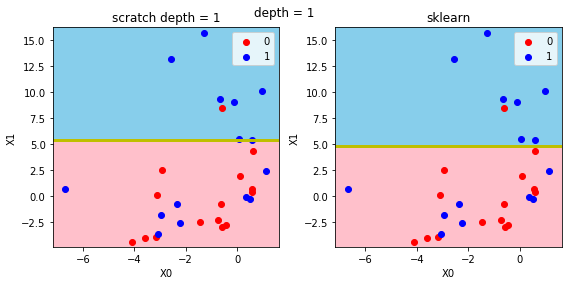

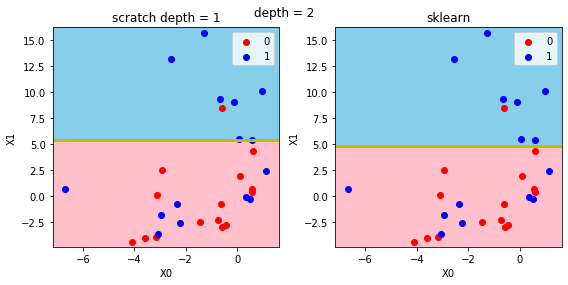

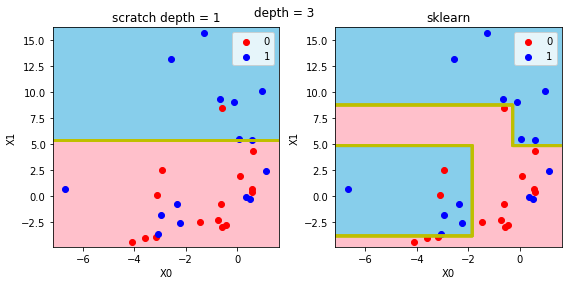

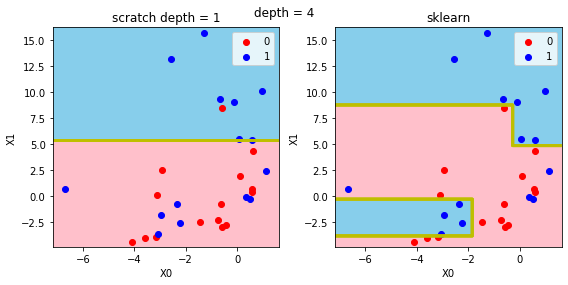

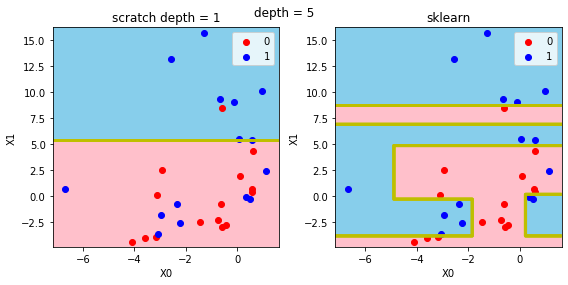

In [22]:
y_choice = [0, 1]
X_choice = ['X0', 'X1']
# 決定領域の図
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# setting
n_class=2
scatter_color = ['red', 'blue']
contourf_color = ['pink', 'skyblue']
target_names = y_choice

for depth in range(1, 6):

    fig = plt.figure(figsize=(4*n_class, 4))
    fig.suptitle('depth = {}'.format(depth))
    X = X_train
    y = y_train

    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, 0.01), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, 0.01))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]

    # scratch_pred
    mesh_pred = scratch.predict(mesh).reshape(mesh_f0.shape)
    # scratch plot
    ax = fig.add_subplot(1, 2, 1)
    ax.set_xlabel(X_choice[0])
    ax.set_ylabel(X_choice[1])
    ax.set_title('scratch depth = 1')
    ax.contourf(mesh_f0, mesh_f1, mesh_pred, cmap=ListedColormap(contourf_color))
    ax.contour(mesh_f0, mesh_f1, mesh_pred, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        ax.scatter(X[y==target][:, 0], X[y==target][:, 1], color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    ax.legend(handles=patches)
    ax.legend()

    # sklearn_pred
    sklearn = DecisionTreeClassifier(max_depth = depth)
    sklearn.fit(X, y)
    mesh_pred = sklearn.predict(mesh).reshape(mesh_f0.shape)
    # sklearn plot
    ax = fig.add_subplot(1, 2, 2)
    ax.set_xlabel(X_choice[0])
    ax.set_ylabel(X_choice[1])
    ax.set_title('sklearn')
    ax.contourf(mesh_f0, mesh_f1, mesh_pred, cmap=ListedColormap(contourf_color))
    ax.contour(mesh_f0, mesh_f1, mesh_pred, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        ax.scatter(X[y==target][:, 0], X[y==target][:, 1], color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    ax.legend(handles=patches)
    ax.legend()

    fig.tight_layout()
    plt.show()

## 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成
深さが2の決定木分類器のクラスScratchDecesionTreeClassifierDepth2を作成してください。

深さ2とは空間の分割を2回行うことを指します。

**《ヒント》**

各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

- 問題8のスクラッチへ実装

## 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成
深さに制限のない決定木分類器のクラスScratchDecesionTreeClassifierDepthInfを作成してください。

任意の深さを指定できるようにするとともに、指定しない場合は全ての葉ノードがジニ不純度0となるまで続けられるようにもしてください。

- 下のスクラッチへ実装

In [23]:
import numpy as np

class ScratchNode():
    def __init__(self, X_train, y_train, parent_index, current_depth, max_depth):
        self.X_train = X_train
        self.y_train = y_train
        #　今のノードのインデックス
        self.parent_index = parent_index
        #　今の深さ
        self.current_depth = current_depth
        # 最大の深さ
        self.max_depth = max_depth
        # 閾値
        self.threshold = None
        # 閾値として選択される特徴量 
        self.features_column = None
        #　今のノードのジニ不純度
        self.gini_impurity = self._Gini_impurity(self.y_train[self.parent_index])
        # 今のノードのラベル、最頻値を取る
        self.y_label = np.argmax(np.bincount(self.y_train[self.parent_index]))
        # 分割後のインデックス
        self.left_index = None
        self.right_index = None
        # 分割後のノード
        self.left = None
        self.right = None
        
    def _Gini_impurity(self, y):
        '''
        -----
        y : 投入するラベルデータ
        Returns
          -----
          ジニ不純度 float
        '''
        node_samples = np.unique(y, return_counts=True)[1]
        return 1 - np.power(node_samples / node_samples.sum(), 2).sum()
   
    def _information_gain(self, y, parent_index, left_index, right_index):
        '''
        -----
        y : 投入するラベルデータ
        parent_index : 親ノードのindex
        left_index : 左側のノードのindex
        right_index : 右側のノードのindex

        parent : 親ノードのラベル
        left : 左側のノードのラベル
        right : 右側のノードのラベル

        Returns
        -----
          情報利得 float
        '''
        parent, left, right = y[parent_index], y[left_index], y[right_index]
        IG = self._Gini_impurity(parent) - (left.shape[0] / parent.shape[0] * self._Gini_impurity(left)) - (right.shape[0] / parent.shape[0] * self._Gini_impurity(right))
        return IG    
    
    # 次のノードを特定する, threshold, features_column, left_index, right_indexを求める
    def next_node_search(self):
        #　情報利得の初期値を設定
        ig = -float('inf')
        for column in range(self.X_train.shape[1]):
            for index in self.parent_index:
                # 閾値を特徴量の値で設定
                threshold = self.X_train[index, column]
                # 閾値をもとに左右のインデックスを取得
                left_all_index = np.where(self.X_train[:, column] >= threshold)[0]
                right_all_index = np.where(self.X_train[:, column] < threshold)[0]
                # 親ノードのインデックスとの共通部分を左右ノードのインデックスとする
                left_index = np.intersect1d(left_all_index, self.parent_index)
                right_index = np.intersect1d(right_all_index, self.parent_index)
                # 情報利得の計算
                ig_calc = self._information_gain(self.y_train, self.parent_index, left_index, right_index)
                # 情報利得が最大となる情報をインスタンス変数へ記録
                if ig_calc > ig:
                    ig = ig_calc
                    node_info = (threshold, column, left_index, right_index)
        return node_info
    
    #　次のノードに分割する判断
    def split(self):
        # 今のノードの深さと最大の深さが一致、ジニ不純度が0の時は分割を行わない
        if self.current_depth == self.max_depth or self.gini_impurity == 0:
            pass
        else:
            # 次のノードに分割する為の情報を特定するために関数を呼び出す
            self.threshold, self.features_column, self.left_index, self.right_index = self.next_node_search()
            
            #　全ての特徴量が一致している場合等で分割が行えていない場合は処理を行う
            if not self.right_index.size:
                self.left_index = self.parent_index[:self.parent_index.size//2]
                self.right_index = self.parent_index[self.parent_index.size//2:]
            
            # 更新された情報をもとに、左右のノードオブジェクトを作成
            self.left = ScratchNode(X_train=self.X_train, y_train=self.y_train, parent_index=self.left_index, current_depth=self.current_depth+1, max_depth=self.max_depth)
            self.right = ScratchNode(X_train=self.X_train, y_train=self.y_train, parent_index=self.right_index, current_depth=self.current_depth+1, max_depth=self.max_depth)
            
            # 左右のノードオブジェクトでsplitを再帰的に呼び出す
            self.left.split()
            self.right.split()
    
    def predict(self, X_test_row):
        # 今のノードの深さが最大の深さと一致、ジニ不純度が０の時は、y_labelを返す
        if self.current_depth == self.max_depth or self.gini_impurity == 0:
            return self.y_label
        # 今のノードの閾値を選択された特徴量で判断し、次のノードで予測する
        else:
            if X_test_row[self.features_column] >= self.threshold:
                return self.left.predict(X_test_row)
            else:
                return self.right.predict(X_test_row)

class ScratchDecesionTreeClassifierDepthinf():
    """
    深さを制限しない決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    max_depth : int
      探索する深さの設定
    """
    def __init__(self, max_depth=np.iinfo(np.int32).max ,verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        self.n_samples = None   #ラベルの数
        self.n_features = None  #特徴量の数

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.n_samples, self.n_features = X.shape
        # 親ノードのインデックス（深さ０）
        parent_index = np.arange(self.n_samples)
        # ノードオブジェクトを作成
        self.node = ScratchNode(X, y, parent_index=parent_index, current_depth=0, max_depth=self.max_depth)
        # ノードを分割していく
        self.node.split()
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        m_samples, m_features = X.shape
        # fit　が呼び出されていない場合は　エラー
        if not self.n_samples:
            print("It hasn't been fitted yet.")
        # 特徴量の数が一致しないは　エラー
        elif m_features != self.n_features:
            print('The number of features does not match.')
        else:
            # 予測値を格納する箱を作成
            pred = np.zeros(m_samples, dtype=np.int32)
            # 投入したサンプル毎に予測していく
            for row in range(m_samples):
                pred[row] = self.node.predict(X[row])
            return pred

- max_depth 1-10 でscratchとsklearnを比較してみる

In [24]:
y_choice = [0, 1]
X_choice = ['X0', 'X1']
# 決定領域の図
def decision_tree_plot(X_train, y_train, X_choice, y_choice, depth):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    import matplotlib.patches as mpatches
    # setting
    n_class=len(y_choice)
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    target_names = y_choice

    fig = plt.figure(figsize=(4*n_class, 4))
    fig.suptitle('depth = {}'.format(depth))
    X = X_train
    y = y_train

    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, 0.01), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, 0.01))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]

    # clf_object
    scratch = ScratchDecesionTreeClassifierDepthinf(max_depth = depth)
    from sklearn.tree import DecisionTreeClassifier
    sklearn = DecisionTreeClassifier(max_depth = depth)
    clf = [scratch, sklearn]
    title = ['scratch', 'sklearn']
    for i in range(len(clf)):
        clf[i].fit(X, y)
        mesh_pred = clf[i].predict(mesh).reshape(mesh_f0.shape)
        clf[i].fit(X, y)
        mesh_pred = clf[i].predict(mesh).reshape(mesh_f0.shape)
        # plot
        ax = fig.add_subplot(1, 2, i+1)
        ax.set_xlabel(X_choice[0])
        ax.set_ylabel(X_choice[1])
        ax.set_title(title[i])
        ax.contourf(mesh_f0, mesh_f1, mesh_pred, cmap=ListedColormap(contourf_color))
        ax.contour(mesh_f0, mesh_f1, mesh_pred, colors='y', linewidths=3, alpha=0.5)
        for i, target in enumerate(set(y)):
            ax.scatter(X[y==target][:, 0], X[y==target][:, 1], color=scatter_color[i], label=target_names[i], marker='o')
        patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
        ax.legend(handles=patches)
        ax.legend()

    fig.tight_layout()
    plt.show()

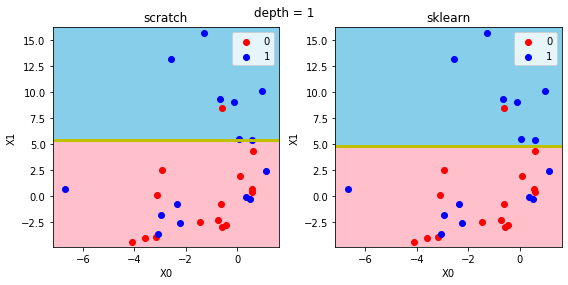

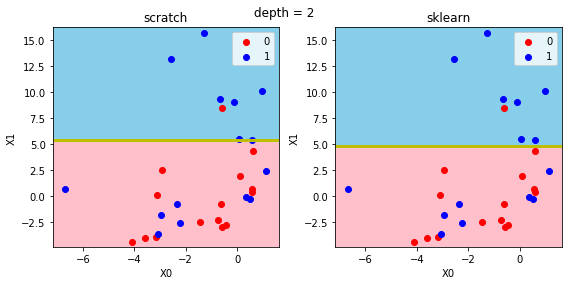

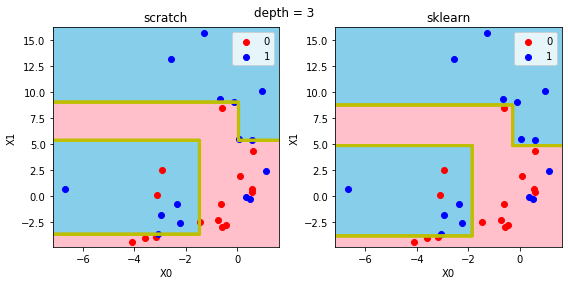

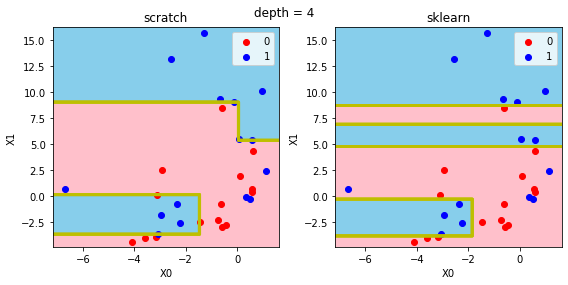

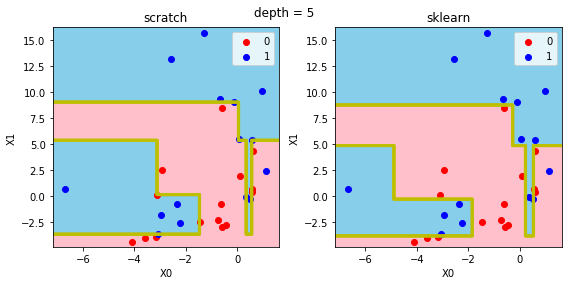

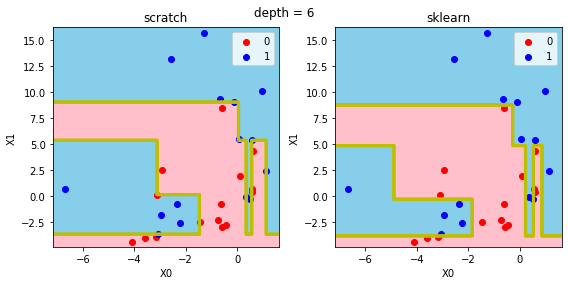

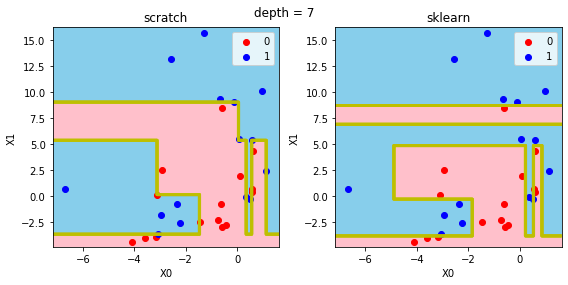

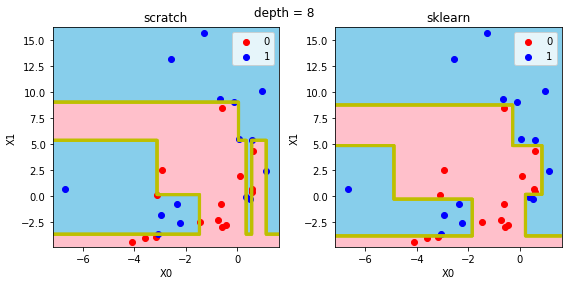

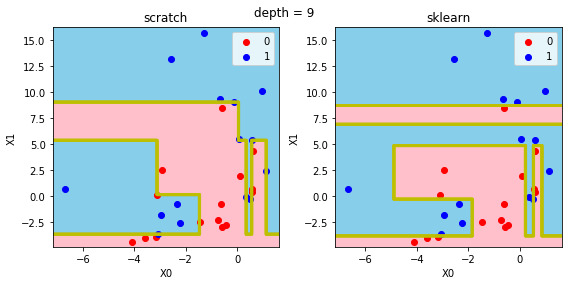

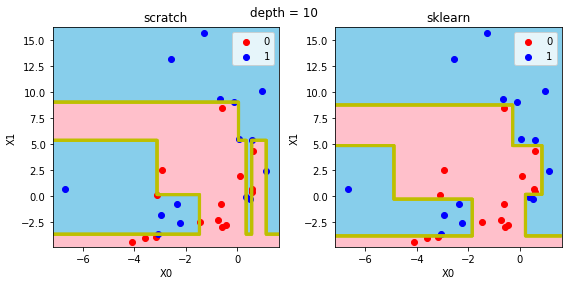

In [25]:
for depth in range(1, 11):
    decision_tree_plot(X_train, y_train, X_choice, y_choice, depth)

-　scratchとsklearnでは閾値の取り方の違いで分類の分布が異なっていると思われるが、凡そ正しく予測できていると思う
- irisデータでもみてみる

In [26]:
from sklearn.datasets import load_iris
import pandas as pd
iris_data = load_iris()
iris_data.keys(), iris_data.target_names, iris_data.feature_names

(dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [27]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_X = pd.DataFrame(iris_data.data, columns=feature_names)
df_y = pd.DataFrame(iris_data.target, columns=['Species'])
df = pd.concat([df_X, df_y], axis=1)
df['Species_name'] = iris_data.target_names[df['Species']]
# Speicies versicolor　と virginica(1　と 2)を選択
# 特徴量　'sepal_width', 'sepal_length'を選択　　　　（特徴量間にあまり相関がみられない）
X_choice = [ 'sepal_width', 'sepal_length']
y_choice = ['versicolor', 'virginica']
df_choice = df[df['Species_name'].isin(y_choice)][X_choice + ['Species', 'Species_name']]
from sklearn.model_selection import train_test_split
X = df_choice.iloc[:, 0:2].values
y = df_choice.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

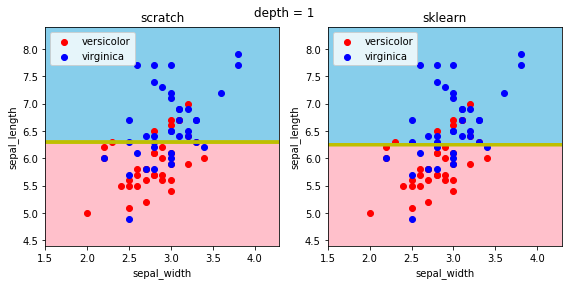

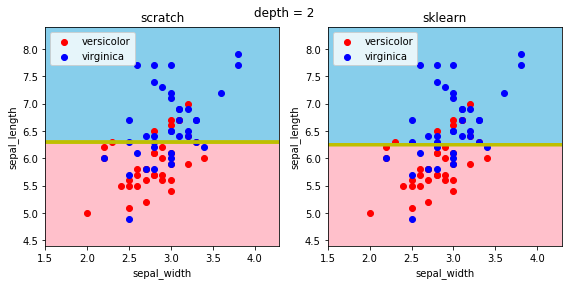

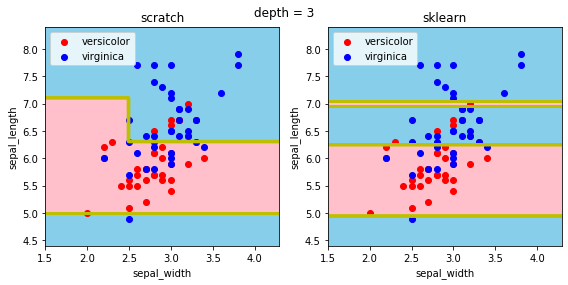

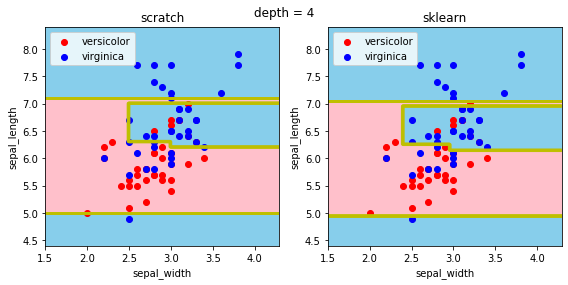

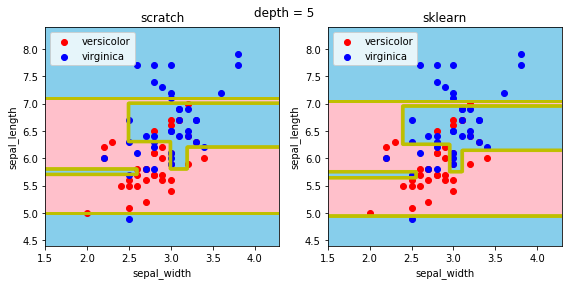

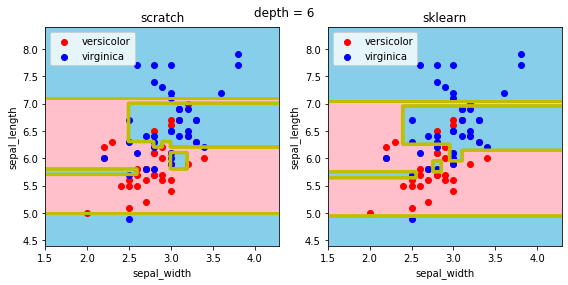

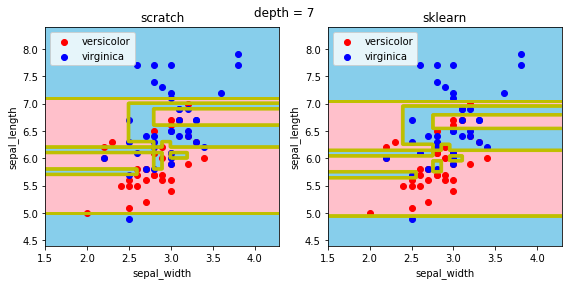

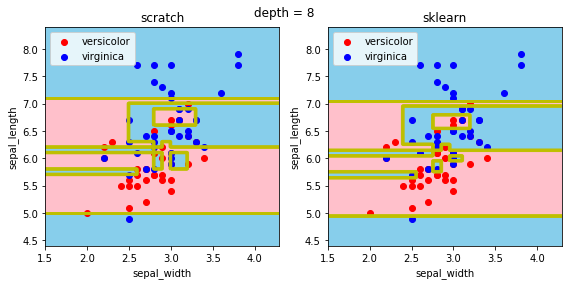

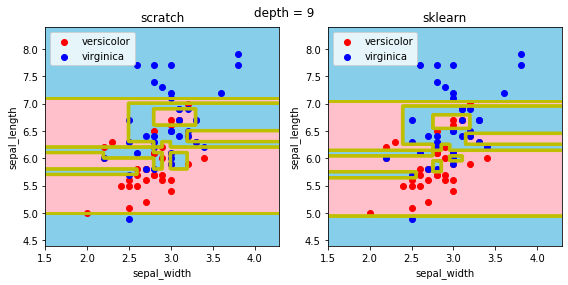

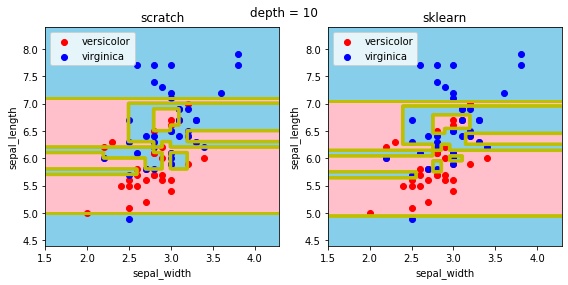

In [28]:
for depth in range(1, 11):
    decision_tree_plot(X_train, y_train, X_choice, y_choice, depth)